In [433]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/svhn_lwf_final_svhn'

In [434]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['args-2025-01-23-16-07.txt',
 'raw_log-2025-01-23-15-35.txt',
 'args-2025-01-23-15-17.txt',
 'args-2025-01-23-15-26.txt',
 'stdout-2025-01-23-16-21.txt',
 'raw_log-2025-01-23-15-17.txt',
 'raw_log-2025-01-23-15-26.txt',
 'stdout-2025-01-23-15-51.txt',
 'stderr-2025-01-23-15-26.txt',
 'stderr-2025-01-23-15-35.txt',
 'raw_log-2025-01-23-15-43.txt',
 'stdout-2025-01-23-15-59.txt',
 'stderr-2025-01-23-15-17.txt',
 'raw_log-2025-01-23-16-07.txt',
 'raw_log-2025-01-23-15-51.txt',
 'args-2025-01-23-15-51.txt',
 'stdout-2025-01-23-15-26.txt',
 'stdout-2025-01-23-15-17.txt',
 'raw_log-2025-01-23-16-14.txt',
 'stderr-2025-01-23-15-51.txt',
 'stderr-2025-01-23-15-43.txt',
 'args-2025-01-23-15-43.txt',
 'stderr-2025-01-23-15-59.txt',
 'stderr-2025-01-23-16-21.txt',
 'args-2025-01-23-15-59.txt',
 'raw_log-2025-01-23-16-21.txt',
 'args-2025-01-23-16-21.txt',
 'stdout-2025-01-23-16-07.txt',
 'stderr-2025-01-23-16-14.txt',
 'args-2025-01-23-15-35.txt',
 'raw_log-2025-01-23-15-59.txt',
 'stdout-2025-0

In [435]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [436]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [437]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [438]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [439]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

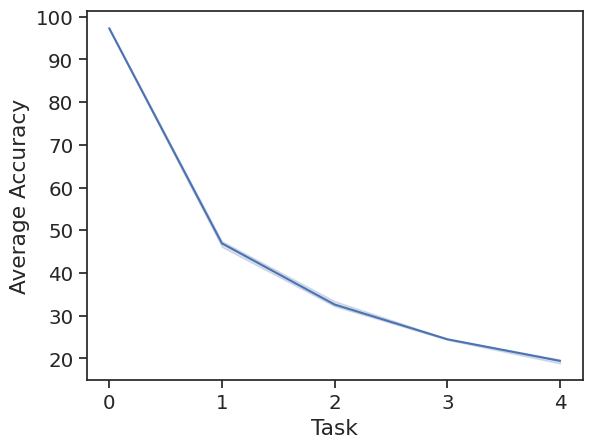

In [440]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy')

In [441]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                97.30                 NaN
         1                46.92               97.30
         2                32.59               94.97
         3                24.45               95.85
         4                19.39               95.64

In [442]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/svhn_ewc_final_svhn'

In [443]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [444]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [445]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [446]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [447]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

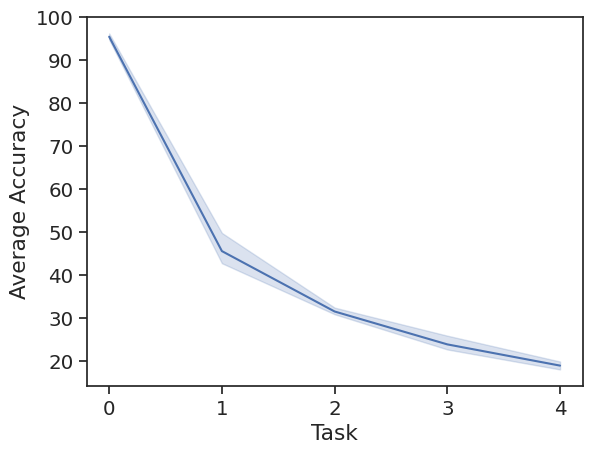

In [448]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [449]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                95.49                 NaN
         1                45.61               85.88
         2                31.56               85.95
         3                23.90               87.48
         4                18.97               87.44

In [450]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/svhn_lwm_final_svhn'

In [451]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['raw_log-2025-01-24-08-16.txt',
 'stderr-2025-01-24-07-55.txt',
 'raw_log-2025-01-24-07-55.txt',
 'raw_log-2025-01-24-07-47.txt',
 'stdout-2025-01-24-09-03.txt',
 'args-2025-01-24-08-44.txt',
 'stderr-2025-01-24-09-03.txt',
 'args-2025-01-24-08-25.txt',
 'stderr-2025-01-24-08-44.txt',
 'stderr-2025-01-24-08-35.txt',
 'args-2025-01-24-09-03.txt',
 'stderr-2025-01-24-08-06.txt',
 'stderr-2025-01-24-08-54.txt',
 'raw_log-2025-01-24-08-54.txt',
 'raw_log-2025-01-24-08-06.txt',
 'stderr-2025-01-24-07-47.txt',
 'stdout-2025-01-24-08-35.txt',
 'args-2025-01-24-08-16.txt',
 'stdout-2025-01-24-08-44.txt',
 'stdout-2025-01-24-08-06.txt',
 'stderr-2025-01-24-08-16.txt',
 'raw_log-2025-01-24-08-25.txt',
 'args-2025-01-24-08-35.txt',
 'stdout-2025-01-24-08-54.txt',
 'stdout-2025-01-24-07-55.txt',
 'stdout-2025-01-24-08-25.txt',
 'stderr-2025-01-24-08-25.txt',
 'raw_log-2025-01-24-08-44.txt',
 'stdout-2025-01-24-08-16.txt',
 'raw_log-2025-01-24-09-03.txt',
 'args-2025-01-24-07-47.txt',
 'args-2025-

In [452]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [453]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [454]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [455]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [456]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

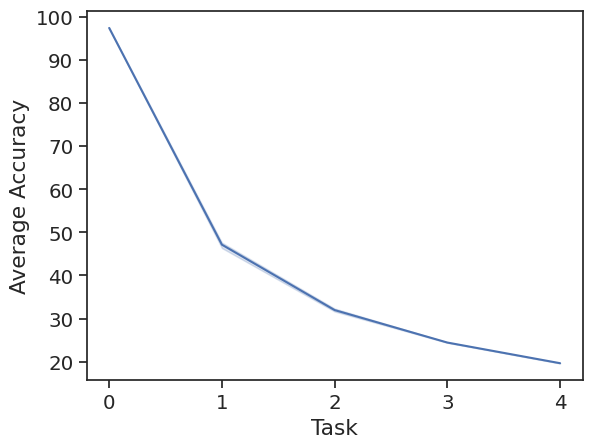

In [457]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [458]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                97.37                 NaN
         1                47.12               97.37
         2                31.96               95.77
         3                24.43               95.80
         4                19.64               87.36

In [459]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/svhn_icarl_final_svhn_new'

In [460]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['raw_log-2025-01-18-20-29.txt',
 'stderr-2025-01-18-20-43.txt',
 'stderr-2025-01-18-20-25.txt',
 'stdout-2025-01-18-20-43.txt',
 'stdout-2025-01-18-20-21.txt',
 'args-2025-01-18-20-21.txt',
 'stdout-2025-01-18-20-25.txt',
 'raw_log-2025-01-18-20-13.txt',
 'raw_log-2025-01-18-20-17.txt',
 'args-2025-01-18-20-43.txt',
 'stderr-2025-01-18-20-38.txt',
 'stderr-2025-01-18-20-21.txt',
 'args-2025-01-18-20-33.txt',
 'stderr-2025-01-18-20-29.txt',
 'args-2025-01-18-20-25.txt',
 'raw_log-2025-01-18-20-33.txt',
 'args-2025-01-18-20-38.txt',
 'stdout-2025-01-18-20-17.txt',
 'stderr-2025-01-18-20-13.txt',
 'raw_log-2025-01-18-20-43.txt',
 'args-2025-01-18-20-17.txt',
 'args-2025-01-18-20-29.txt',
 'stdout-2025-01-18-20-13.txt',
 'stdout-2025-01-18-20-29.txt',
 'stdout-2025-01-18-20-38.txt',
 'stdout-2025-01-18-20-33.txt',
 'raw_log-2025-01-18-20-21.txt',
 'args-2025-01-18-20-13.txt',
 'raw_log-2025-01-18-20-25.txt',
 'raw_log-2025-01-18-20-38.txt',
 'stderr-2025-01-18-20-33.txt',
 'stderr-2025-01

In [461]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

8

In [462]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [463]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [464]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [465]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [466]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                93.86                 NaN
         1                77.89               20.50
         2                57.51               41.35
         3                48.79               46.87
         4                37.34               54.10

In [467]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/svhn_rere_lrp_final_svhn'

In [468]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['stdout-2025-01-21-20-30.txt',
 'args-2025-01-22-01-13.txt',
 'stderr-2025-01-23-02-52.txt',
 'stdout-2025-01-22-07-35.txt',
 'stderr-2025-01-22-11-27.txt',
 'raw_log-2025-01-22-23-05.txt',
 'stdout-2025-01-23-02-52.txt',
 'stderr-2025-01-22-23-05.txt',
 'args-2025-01-22-07-35.txt',
 'raw_log-2025-01-22-15-13.txt',
 'stdout-2025-01-22-01-13.txt',
 'stderr-2025-01-22-15-13.txt',
 'stdout-2025-01-22-15-13.txt',
 'stderr-2025-01-21-20-30.txt',
 'raw_log-2025-01-22-01-13.txt',
 'stdout-2025-01-22-04-51.txt',
 'stderr-2025-01-22-04-51.txt',
 'raw_log-2025-01-22-07-35.txt',
 'stderr-2025-01-22-18-57.txt',
 'stdout-2025-01-22-23-05.txt',
 'stdout-2025-01-21-20-29.txt',
 'stdout-2025-01-22-11-27.txt',
 'args-2025-01-22-18-57.txt',
 'args-2025-01-23-02-52.txt',
 'args-2025-01-22-23-05.txt',
 'args-2025-01-22-04-51.txt',
 'args-2025-01-22-15-13.txt',
 'stderr-2025-01-22-07-35.txt',
 'args-2025-01-22-11-27.txt',
 'stdout-2025-01-22-18-57.txt',
 'raw_log-2025-01-22-04-51.txt',
 'raw_log-2025-01-2

In [469]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

8

In [470]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [471]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [472]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [473]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

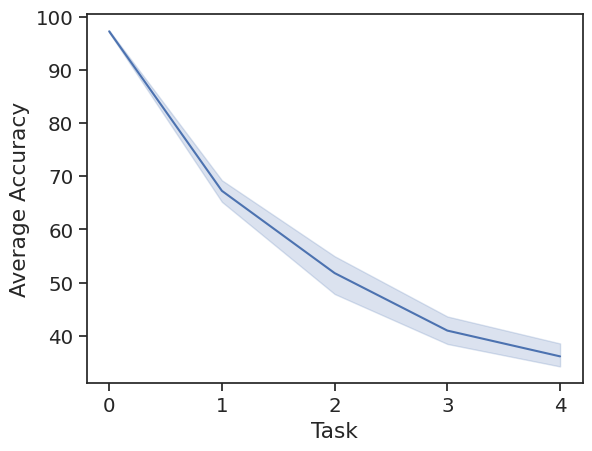

In [474]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [475]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                97.27                 NaN
         1                67.26               31.88
         2                51.78               29.83
         3                40.96               27.12
         4                36.11               21.77

In [476]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/svhn_joint_final_svhn_new'

In [477]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stdout-2025-01-18-18-52.txt',
 'raw_log-2025-01-18-18-52.txt',
 'stderr-2025-01-18-19-06.txt',
 'stderr-2025-01-18-18-52.txt',
 'stderr-2025-01-18-18-43.txt',
 'stderr-2025-01-18-19-13.txt',
 'raw_log-2025-01-18-19-13.txt',
 'args-2025-01-18-19-13.txt',
 'stdout-2025-01-18-19-29.txt',
 'args-2025-01-18-18-26.txt',
 'stderr-2025-01-18-18-34.txt',
 'stdout-2025-01-18-19-21.txt',
 'args-2025-01-18-18-59.txt',
 'args-2025-01-18-19-21.txt',
 'raw_log-2025-01-18-18-43.txt',
 'stderr-2025-01-18-19-29.txt',
 'stdout-2025-01-18-18-34.txt',
 'args-2025-01-18-19-06.txt',
 'stderr-2025-01-18-18-26.txt',
 'raw_log-2025-01-18-18-34.txt',
 'raw_log-2025-01-18-19-21.txt',
 'raw_log-2025-01-18-18-59.txt',
 'raw_log-2025-01-18-18-26.txt',
 'raw_log-2025-01-18-19-06.txt',
 'stdout-2025-01-18-19-13.txt',
 'stdout-2025-01-18-18-43.txt',
 'stderr-2025-01-18-19-21.txt',
 'args-2025-01-18-19-29.txt',
 'stdout-2025-01-18-18-26.txt',
 'stderr-2025-01-18-18-59.txt',
 'args-2025-01-18-18-34.txt',
 'stdout-2025-

In [478]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [479]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [480]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [481]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [482]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

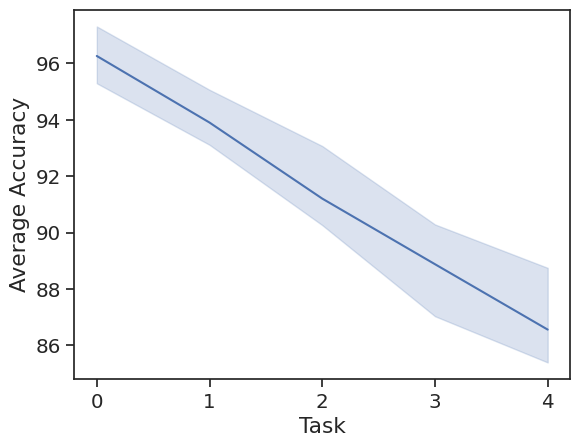

In [483]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy')

In [484]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                96.26                 NaN
         1                93.90                1.38
         2                91.20                2.48
         3                88.88                2.99
         4                86.55                2.54

In [485]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

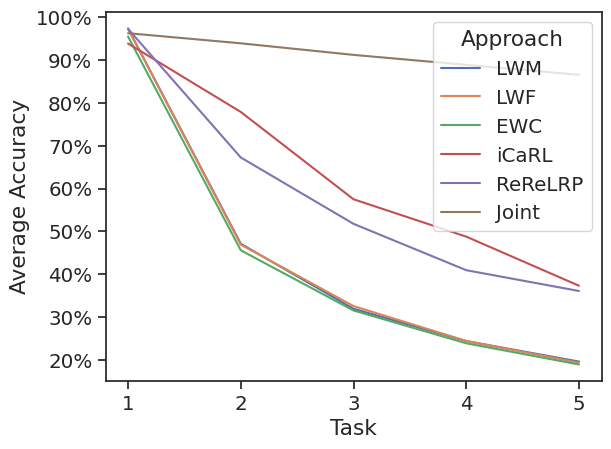

In [486]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
plt.close()
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, errorbar=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("svhn.pdf", format='pdf', bbox_inches='tight')
plt.show()
plt.close()
